# Rental Bike Predictions with Sklearn Regression Trees
## I. Setup

In [2]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn.feature_extraction
import sklearn.tree as tree
import sklearn.metrics as metrics
# from sklearn.metrics import mean_absolute_error, median_absolute_error
# from sklearn.metrics import mean_absolute_percentage_error
# from sklearn.metrics import explained_variance_score

import util

In [3]:
bikes = pd.read_csv("SeoulBikeData.csv")
train, dev = util.split(bikes, [0.8, 0.2], seed=2022)

TARGET = "Rented Bike Count"
train.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## II. Prepare Data

In [4]:
train_y = np.array(train["Rented Bike Count"], dtype=np.float32)
dev_y = np.array(dev["Rented Bike Count"], dtype=np.float32)
train_y

array([ 254.,  204.,  173., ..., 1003.,  764.,  712.], dtype=float32)

In [26]:
def df_to_json(df):
    df_json = (
        df.drop(["Date", "Rented Bike Count"], axis=1)
        .to_json(orient="records"))
    return json.loads(df_json)

In [27]:
train_x_json = df_to_json(train)
dev_x_json =df_to_json(dev)
train_x_json[:2]

[{'Hour': 0,
  'Temperature(°C)': -5.2,
  'Humidity(%)': 37,
  'Wind speed (m/s)': 2.2,
  'Visibility (10m)': 2000,
  'Dew point temperature(°C)': -17.6,
  'Solar Radiation (MJ/m2)': 0.0,
  'Rainfall(mm)': 0.0,
  'Snowfall (cm)': 0.0,
  'Seasons': 'Winter',
  'Holiday': 'No Holiday',
  'Functioning Day': 'Yes'},
 {'Hour': 1,
  'Temperature(°C)': -5.5,
  'Humidity(%)': 38,
  'Wind speed (m/s)': 0.8,
  'Visibility (10m)': 2000,
  'Dew point temperature(°C)': -17.6,
  'Solar Radiation (MJ/m2)': 0.0,
  'Rainfall(mm)': 0.0,
  'Snowfall (cm)': 0.0,
  'Seasons': 'Winter',
  'Holiday': 'No Holiday',
  'Functioning Day': 'Yes'}]

In [29]:
dict_vectorizer = sklearn.feature_extraction.DictVectorizer(sparse=False)
train_x = dict_vectorizer.fit_transform(train_x_json)
dev_x = dict_vectorizer.transform(dev_x_json)
train_x

array([[-1.760e+01,  0.000e+00,  1.000e+00, ..., -5.200e+00,  2.000e+03,
         2.200e+00],
       [-1.760e+01,  0.000e+00,  1.000e+00, ..., -5.500e+00,  2.000e+03,
         8.000e-01],
       [-1.770e+01,  0.000e+00,  1.000e+00, ..., -6.000e+00,  2.000e+03,
         1.000e+00],
       ...,
       [-1.030e+01,  0.000e+00,  1.000e+00, ...,  4.200e+00,  1.894e+03,
         2.600e+00],
       [-9.900e+00,  0.000e+00,  1.000e+00, ...,  3.400e+00,  2.000e+03,
         2.300e+00],
       [-9.800e+00,  0.000e+00,  1.000e+00, ...,  2.100e+00,  1.859e+03,
         1.000e+00]])

In [30]:
feature_names = dict_vectorizer.get_feature_names_out()
feature_names

array(['Dew point temperature(°C)', 'Functioning Day=No',
       'Functioning Day=Yes', 'Holiday=Holiday', 'Holiday=No Holiday',
       'Hour', 'Humidity(%)', 'Rainfall(mm)', 'Seasons=Autumn',
       'Seasons=Spring', 'Seasons=Summer', 'Seasons=Winter',
       'Snowfall (cm)', 'Solar Radiation (MJ/m2)', 'Temperature(°C)',
       'Visibility (10m)', 'Wind speed (m/s)'], dtype=object)

## III. Fit Decision Tree

In [60]:
model = tree.DecisionTreeRegressor(min_samples_leaf=10)
model.fit(train_x, train_y)
preds = model.predict(dev_x)

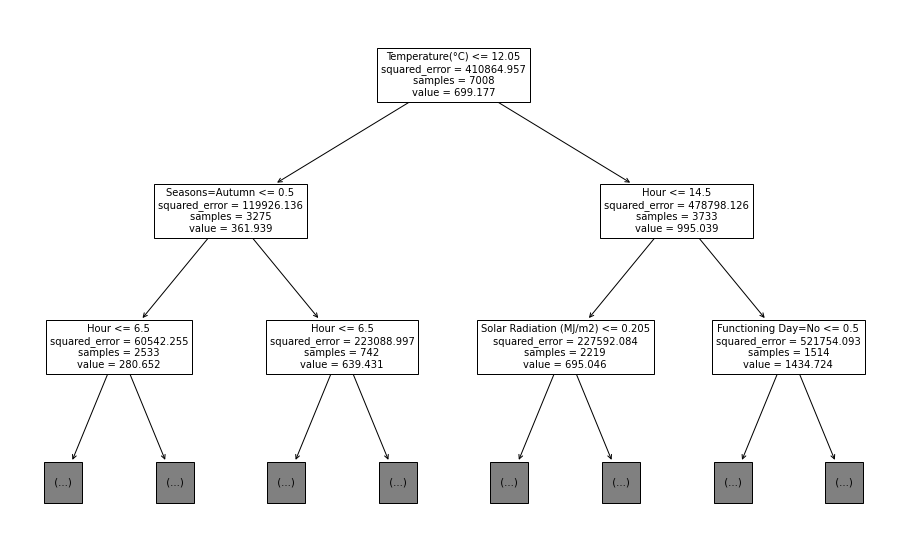

In [61]:
plt.figure(figsize=(16, 10))
tree.plot_tree(model, max_depth=2, fontsize=10, feature_names=feature_names)
plt.show()

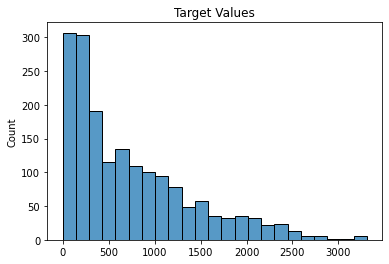

In [62]:
sns.histplot(dev_y)
plt.title("Target Values")
plt.show()

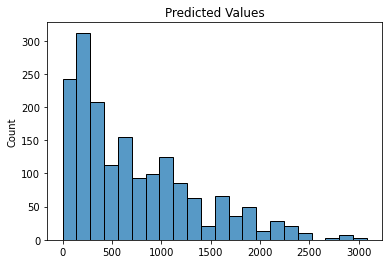

In [63]:
sns.histplot(preds)
plt.title("Predicted Values")
plt.show()

In [64]:
mae = metrics.mean_absolute_error(dev_y, preds)
print("Mean Absolute Error:\t\t", f"{mae:.1f}")
med_ae = metrics.median_absolute_error(dev_y, preds)
print("Median Absolute Error:\t\t", f"{med_ae:.1f}")
evs = metrics.explained_variance_score(dev_y, preds)
print("Explaned Variance Score:\t", f"{evs:.1f}")

Mean Absolute Error:		 170.9
Median Absolute Error:		 92.3
Explaned Variance Score:	 0.8


In [65]:
residuals = pd.DataFrame({"true":dev_y, "pred":preds})
residuals["error"] = residuals.pred - residuals.true
residuals = residuals.sort_values("true")
residuals

,true,pred,error
1452,0.0,0.000000,0.000000
1463,0.0,0.000000,0.000000
594,0.0,186.909091,186.909091
1440,0.0,0.000000,0.000000
595,0.0,785.200000,785.200000
...,...,...,...
1321,3166.0,2832.941176,-333.058824
1026,3196.0,2832.941176,-363.058824
838,3245.0,1956.500000,-1288.500000
1364,3256.0,2832.941176,-423.058824


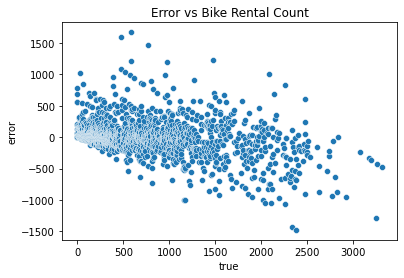

In [66]:
sns.scatterplot(data=residuals, x="true", y="error")
plt.title("Error vs Bike Rental Count")
plt.show()

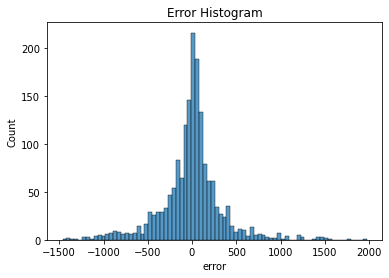

In [56]:
sns.histplot(data=residuals, x="error")
plt.title("Error Histogram")
plt.show()

In [57]:
model.tree_.node_count

101

In [58]:
preds

array([ 246.26213592,  269.7047619 ,  399.2481203 , ..., 1028.36082474,
       1028.36082474, 1028.36082474])

In [59]:
dev.assign(preds=preds)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,preds
10,1/12/2017,339,10,-3.5,24,1.2,1996,-21.2,0.65,0.0,0.0,Winter,No Holiday,Yes,246.262136
12,1/12/2017,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,Winter,No Holiday,Yes,269.704762
17,1/12/2017,555,17,0.8,58,1.6,2000,-6.5,0.08,0.0,0.0,Winter,No Holiday,Yes,399.248120
34,2/12/2017,334,10,-0.4,57,1.6,1309,-7.8,0.80,0.0,0.0,Winter,No Holiday,Yes,269.704762
38,2/12/2017,611,14,7.3,35,1.3,1955,-7.1,0.99,0.0,0.0,Winter,No Holiday,Yes,397.089041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,30/11/2018,720,12,6.6,35,1.3,1409,-7.8,1.70,0.0,0.0,Autumn,No Holiday,Yes,824.089431
8750,30/11/2018,761,14,7.8,20,2.2,2000,-13.8,1.67,0.0,0.0,Autumn,No Holiday,Yes,824.089431
8754,30/11/2018,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes,1028.360825
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes,1028.360825
